![Patrones](https://drive.google.com/uc?export=view&id=1FVBEDeOK1dmp3cpfhbq82lA-eI0ZZJW1)

## **`Challenge 4 `**
    
## <center>Acerca de los datos </center>

​**Este conjunto de datos contiene 2126 registros de características extraídas de exámenes de Cardiotocograma, que luego fueron clasificados por un obstetra experto en 3 clases: "Normal", "Suspect" y "Pathological". El conjunto de datos contiene las siguientes características:**
    
* **baseline value:** Valor de línea base de la frecuencia cardíaca fetal (FHR) (latidos por minuto)   
* **accelerations:** Número de aceleraciones por segundo
* **fetal_movement:** Número de movimientos fetales por segundo    
* **uterine_contractions:** Número de contracciones uterinas por segundo
* **light_decelerations:** Número de desaceleraciones leves (LDs) por segundo
* **severe_decelerations:** Número de desaceleraciones severas (SDs) por segundo
* **prolongued_decelerations:** Número de desaceleraciones prolongadas (PDs) por segundo
* **abnormal_short_term_variability:** Porcentaje de tiempo con variabilidad anormal a corto plazo
* **mean_value_of_short_term_variability:** Valor medio de la variabilidad a corto plazo
* **percentage_of_time_with_abnormal_long_term_variability:** Porcentaje de tiempo con variabilidad anormal a largo plazo
* **mean_value_of_long_term_variability:** Valor medio de la variabilidad a largo plazo
* **histogram_width:** Ancho del histograma creado usando todos los valores de un registro
* **histogram_min:** Valor mínimo del histograma
* **histogram_max:** Valor máximo del histograma
* **histogram_number_of_peaks:** Número de picos en el histograma del examen
* **histogram_number_of_zeroes:** Número de ceros en el histograma del examen
* **histogram_mode:** Modo del histograma
* **histogram_mean:** Media del histograma
* **histogram_median:** Mediana del histograma
* **histogram_variance:** Varianza del histograma
* **histogram_tendency:** Tendencia del histograma
* **fetal_health:** Codificado como 1-Normal(Normal); 2-Sospechoso(Suspect); 3-Patológic(Pathological).



<br>

Datos extraidos de :

https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification <br>

<br>


> Nota <br> Si la base de datos es usada para investigación citar a: <br>
    `Ayres de Campos et al. (2000) SisPorto 2.0 A Program for Automated Analysis of Cardiotocograms. J Matern Fetal Med 5:311-318`. [<small>DOI: 10.1002/1520-6661(200009/10)9:5<311::AID-MFM12>3.0.CO;2-9</small>](https://doi.org/10.1002/1520-6661(200009/10)9:5%3C311::AID-MFM12%3E3.0.CO;2-9)
<br>

___


### Sobre el Challenge

Implementar cada paso en Python

1.	Utilizar todos los conocimientos adquiridos en el curso.
2.	Escoger las variables usadas para clasificar, y la variable objetivo.

  a. Si la variable objetivo no tiene categorías, crear categorías basadas en intervalos de valores. Por ejemplo, si nuestra variable va del 1 al 10,  podemos crear 5 categorías: categoría1(1-2), categoría2(3-4), categoría3(5-6), categoría4(7-8),categoría5(9-10)<br>
  b. Crear al menos 2 de los modelos de clasificación visto en clase y un modelo de clasificación k-vecinos, donde k es nuestro número de categorías.<br>
  c. 	Dividir el conjunto en entrenamiento y prueba.<br>
  d.	Evaluar nuestro modelo (incluir validación cruzada).<br>
  e.	Generar gráficos de nuestros resultados.<br>



**Todas estas salidas deberán ser reportadas en un documento.**


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://github.com/ulewis/Ejemplos/raw/main/Datos/fetal_health.csv")
df.head()  # vemos los 5 primeros datos del dataframe

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [3]:
df.info(verbose=True) #información de la data que se cuenta

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [4]:
df.isna().sum() #verificamos que no haya nulos en nuestros datos

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [5]:
target=df[['fetal_health']] #target que queremos predecir
columns_t = ['baseline value', 'abnormal_short_term_variability', 'mean_value_of_short_term_variability', 'mean_value_of_long_term_variability'] #features
df2 = df[columns_t] #establecemos las columnas
df2.head() #muestro los 5 primeros valores

,baseline value,abnormal_short_term_variability,mean_value_of_short_term_variability,mean_value_of_long_term_variability
0,120.0,73.0,0.5,2.4
1,132.0,17.0,2.1,10.4
2,133.0,16.0,2.1,13.4
3,134.0,16.0,2.4,23.0
4,132.0,16.0,2.4,19.9


In [6]:
df2.describe() #decribimos los valores que se tienen en cada feature elegido

,baseline value,abnormal_short_term_variability,mean_value_of_short_term_variability,mean_value_of_long_term_variability
count,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,46.990122,1.332785,8.187629
std,9.840844,17.192814,0.883241,5.628247
min,106.000000,12.000000,0.200000,0.000000
25%,126.000000,32.000000,0.700000,4.600000
50%,133.000000,49.000000,1.200000,7.400000
75%,140.000000,61.000000,1.700000,10.800000
max,160.000000,87.000000,7.000000,50.700000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [8]:
features = df.drop("fetal_health", axis=1)
target=df['fetal_health']
X_train, X_test, y_train, y_test = train_test_split(df2, target, test_size=0.2, random_state=42)

In [9]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
knn_model = KNeighborsClassifier(n_neighbors=4)  # Aquí k es el número de categorías que es igual a 4 (4 features)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [11]:
rf_scores = cross_val_score(rf_model, X_train, y_train, cv=5)
print("Random Forest Classifier - Precisión de validación cruzada:", rf_scores.mean())


Random Forest Classifier - Precisión de validación cruzada: 0.9023529411764706


In [12]:
knn_scores = cross_val_score(knn_model, X_train, y_train, cv=5)
print("K-Neighbors Classifier - Precisión de validación cruzada:", knn_scores.mean())

K-Neighbors Classifier - Precisión de validación cruzada: 0.8629411764705882


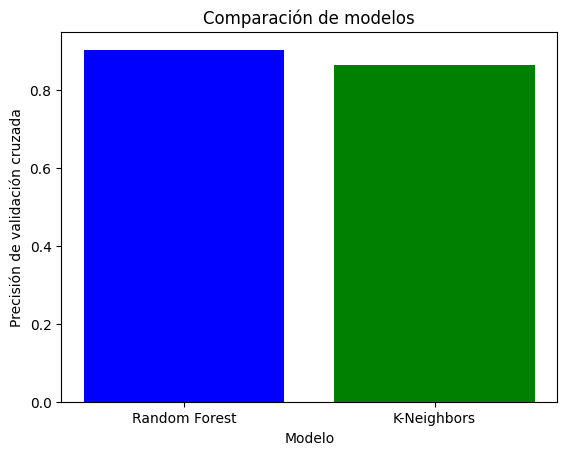

In [13]:
models = ['Random Forest', 'K-Neighbors']
scores = [rf_scores.mean(), knn_scores.mean()]
plt.bar(models, scores, color=['blue', 'green'])
plt.xlabel('Modelo')
plt.ylabel('Precisión de validación cruzada')
plt.title('Comparación de modelos')
plt.show()

In [14]:
y_pred_rf = rf_model.predict(X_test) #y predicho por el modelo de random forest
y_pred_knn = knn_model.predict(X_test) #y predicho por el modelo de KNN

In [15]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

         1.0       0.93      0.98      0.95       333
         2.0       0.84      0.59      0.70        64
         3.0       0.79      0.90      0.84        29

    accuracy                           0.91       426
   macro avg       0.86      0.82      0.83       426
weighted avg       0.91      0.91      0.91       426



In [16]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

         1.0       0.89      0.97      0.93       333
         2.0       0.80      0.44      0.57        64
         3.0       0.73      0.66      0.69        29

    accuracy                           0.87       426
   macro avg       0.81      0.69      0.73       426
weighted avg       0.86      0.87      0.86       426



---------------------------------------------------------------------------------------------------------

**Challenge 6**

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [19]:
preproc = [('scaler', StandardScaler())]

pipeline = Pipeline(steps=preproc + [('K-Neighbors', knn_model)]) #utilizo el mismo modelo que se utilizó en el challenge anterior que es un modelo K-Neighbors

In [20]:
pipeline.fit(X_train,y_train) #A partir del Pipeline creado, fiteo los x e y con los datos estratificados para entrenar a mi modelo

Pipeline(steps=[('scaler', StandardScaler()),
                ('K-Neighbors', KNeighborsClassifier(n_neighbors=4))])

In [21]:
y_pred = pipeline.predict(X_test) #Con el modelo creado y entrenado, comenzamos una predicción con nuestros datos de testeo

In [22]:
print(classification_report(y_test, y_pred)) #Reportamos los resultados

              precision    recall  f1-score   support

         1.0       0.92      0.97      0.94       333
         2.0       0.90      0.58      0.70        64
         3.0       0.75      0.83      0.79        29

    accuracy                           0.90       426
   macro avg       0.86      0.79      0.81       426
weighted avg       0.90      0.90      0.90       426

